In [1]:
from skimage import io                    # utilities to read and write images in various formats
import numpy as np                        # array manipulation package
import matplotlib.pylab as plt            # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)  # set default figure size
plt.rcParams['image.cmap'] = 'gray'       # set default colormap to gray

# Digital Image Processing - Programming Assignment \#3

The following progamming assignment involves image enhancement tasks in spatial and frequency domains. The deadline for returning your work is **2 Nov 18 at 23:59. Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember list all your sources under references.

If you experience problems that you cannot solve using the course material, including the provided pre-tutorials, or related Python documentation, or have any questions regarding to the programming assignments in general, please **do not hesitate to contact the course assistant** by e-mail at address `Soumya Sara John <soumyasara100@gmail.com>
` or by visiting the office/lab

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** Samvram Sahu, SC15B132
* **Contact information:** samvram.iist@gmail.com

# 4. Image enhancement in spatial domain

The gray-scale images `cameraman_noise1.tif` and `cameraman_noise2.tif` and the binary image `logo_noise3.png` contain different types of noise. Your task is to perform image enhancement in spatial domain so that the noise in all three images is reduced. Please note that you cannot to restore the original image (i. e. remove the noise completely). For instance, __[`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html)__ and __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ packages provide useful tools for filtering the noise types.

### Additive Gaussian noise

The image `cameraman_noise1.tif` suffers from additive Gaussian noise:

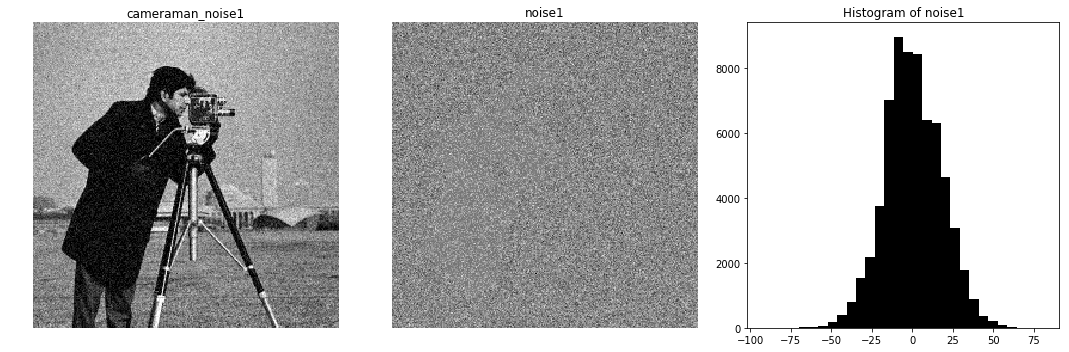

In [2]:
# read image the original 'cameraman.tif' and its noisy version 'cameraman_noise1.tif'
orig = io.imread('cameraman.tif').astype('int32')
noisy1 = io.imread('cameraman_noise1.tif')

# extract the additive noise from the noisy image by subtracting the original image from the noisy one
noise1 = noisy1.astype('int32') - orig

# display the noisy image, noise and histogram of the noise
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
ax[0].set_title('cameraman_noise1')
ax[0].axis('off')
ax[1].imshow(noise1, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise1')
ax[1].axis('off')
ax[2].hist(noise1.flatten(), bins=30, fc='black')
ax[2].set_title('Histogram of noise1')
fig.tight_layout()

**4.1. Perform image enhancement on the `cameraman_noise1.tif` image using a `3x3` mean filter and compute the root mean squared error (RMSE) with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

Hint: You can perform the filtering by first constructing the `3x3` mean filter mask (`NumPy array`) and then convolving the image with it using e.g. __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ function.

RMSE of Noised Image = 17.489726
RMSE of Denoised Image = 14.076713


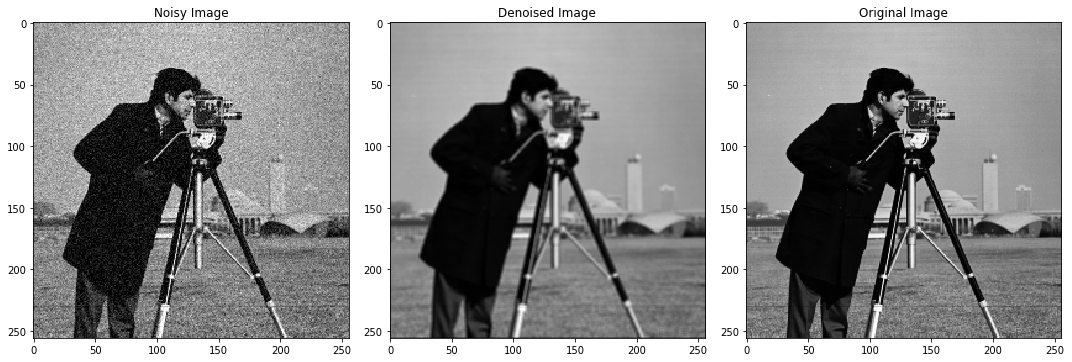

In [13]:
from scipy import signal

# construct mean filter mask
mean_filter = np.array([[1/9,1/9,1/9],
                        [1/9,1/9,1/9],
                        [1/9,1/9,1/9]])


# convolve the noisy image with the constructed filter mask
cam_mean = signal.convolve2d(orig, mean_filter)[1:-1,1:-1]

# display the noisy, enhanced and original images
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')

ax[1].imshow(cam_mean, cmap=plt.get_cmap('gray'))
ax[1].set_title('Denoised Image')

ax[2].imshow(orig, cmap=plt.get_cmap('gray'))
ax[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement
rmse_noised = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
rmse_denoised = np.sqrt(np.mean(np.square(np.ravel(cam_mean)-np.ravel(orig))))

print('RMSE of Noised Image = %f'%rmse_noised)
print('RMSE of Denoised Image = %f'%rmse_denoised)

**4.2. Perform image enhancement on the `cameraman_noise1.tif` image a `3x3` __[median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

RMSE of Noised Image = 17.489726
RMSE of Denoised Image = 13.623619


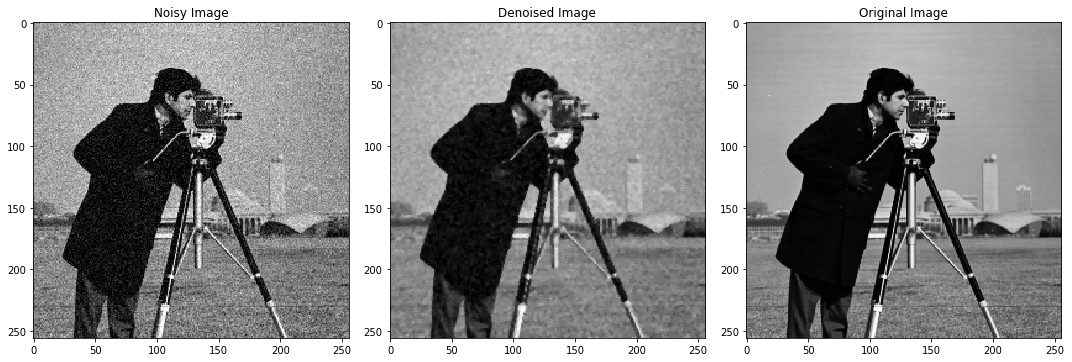

In [15]:
from scipy.ndimage import median_filter

# apply 3x3 median filter on the noisy image image
cam_median = median_filter(noisy1, size=3)

# display the noisy, enhanced and original images
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')

ax[1].imshow(cam_median, cmap=plt.get_cmap('gray'))
ax[1].set_title('Denoised Image')

ax[2].imshow(orig, cmap=plt.get_cmap('gray'))
ax[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement
rmse_noised = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
rmse_denoised = np.sqrt(np.mean(np.square(np.ravel(cam_median)-np.ravel(orig))))

print('RMSE of Noised Image = %f'%rmse_noised)
print('RMSE of Denoised Image = %f'%rmse_denoised)

**4.3. Perform image enhancement on the `cameraman_noise1.tif` image using a `5x5` __[Wiener filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure. Please note that you need to convert the input image into `float64` using `astype('float64')` before applying __[`scipy.signal.wiener()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ function!**

RMSE of Noised Image = 17.489726
RMSE of Denoised Image = 6.129562


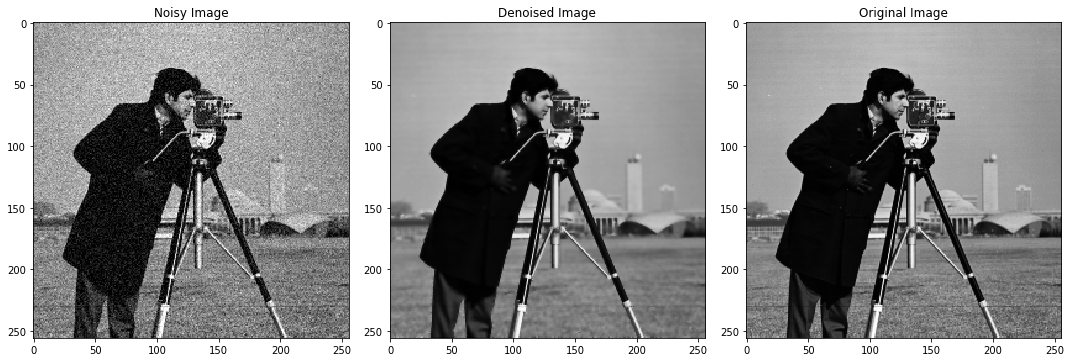

In [17]:
from scipy.signal import wiener
# apply 5x5 Wiener filter on the noisy image
# first convert the input image to float64 using 'astype('float64')'!
orig_64 = orig.astype('float64')
cam_wiener = wiener(orig_64, mysize=3)

# display the noisy, enhanced and original images
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')

ax[1].imshow(cam_wiener, cmap=plt.get_cmap('gray'))
ax[1].set_title('Denoised Image')

ax[2].imshow(orig, cmap=plt.get_cmap('gray'))
ax[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement
rmse_noised = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
rmse_denoised = np.sqrt(np.mean(np.square(np.ravel(cam_wiener)-np.ravel(orig))))

print('RMSE of Noised Image = %f'%rmse_noised)
print('RMSE of Denoised Image = %f'%rmse_denoised)

**4.4. Finally, display the three images obtained with mean, median and Wiener filters in the same figure.**

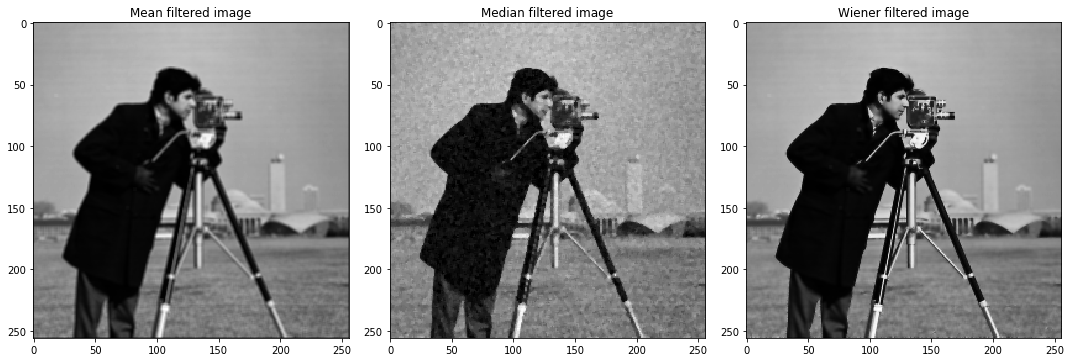

In [18]:
# display the mean, median and Wiener filtered images
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(cam_mean, cmap=plt.get_cmap('gray'))
ax[0].set_title('Mean filtered image')

ax[1].imshow(cam_median, cmap=plt.get_cmap('gray'))
ax[1].set_title('Median filtered image')

ax[2].imshow(cam_wiener, cmap=plt.get_cmap('gray'))
ax[2].set_title('Wiener filtered image')

fig.tight_layout()

**Which method gave the best result?**

Wiener filter provides the best result. It is evident visually as well as its RMSE is least among all.`

### Salt-and-pepper noise

The image `cameraman_noise2.tif` suffers from salt-and-pepper noise:

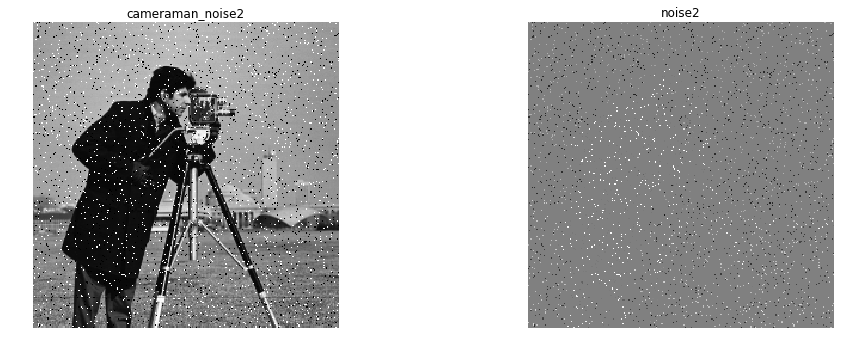

In [21]:
# read the 'cameraman_noise2.tif' image
noisy2 = io.imread('cameraman_noise2.tif')

# extract additive noise2
noise2 = noisy2.astype('int32') - orig

# display the noisy image and additive noise
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(noisy2, cmap=plt.get_cmap('gray'))
ax[0].set_title('cameraman_noise2')
ax[0].axis('off')
ax[1].imshow(noise2, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise2')
ax[1].axis('off')
fig.tight_layout()

**4.5. Utilizing your knowledge in image enhancement, choose a proper filter for reducing the noise in the `cameraman_noise2.tif` image and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

RMSE of Noised Image = 17.489726
RMSE of Denoised Image = 11.511278


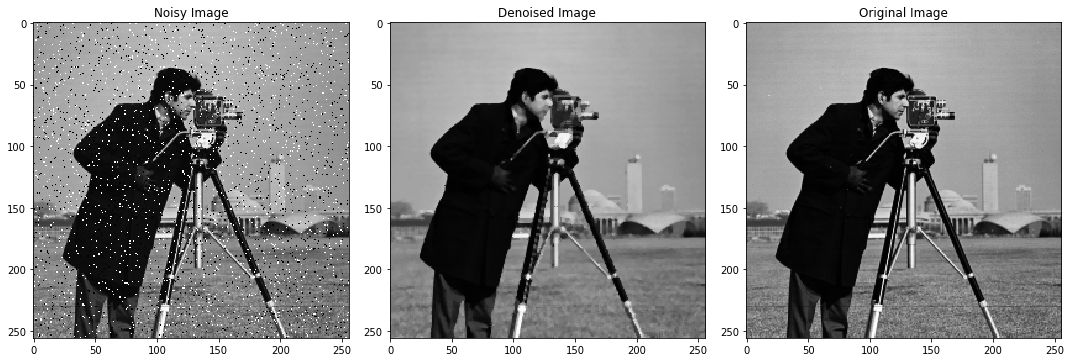

In [23]:
# reduce the noise with the method of your choice
saltpepper_median = median_filter(noisy2, size=3)

# display the noisy, enhanced and original images
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(noisy2, cmap=plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')

ax[1].imshow(saltpepper_median, cmap=plt.get_cmap('gray'))
ax[1].set_title('Denoised Image')

ax[2].imshow(orig, cmap=plt.get_cmap('gray'))
ax[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement
rmse_noised = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
rmse_denoised = np.sqrt(np.mean(np.square(np.ravel(saltpepper_median)-np.ravel(orig))))

print('RMSE of Noised Image = %f'%rmse_noised)
print('RMSE of Denoised Image = %f'%rmse_denoised)

The binary image `logo_noise3.png` suffers from salt-and-pepper noise as well:

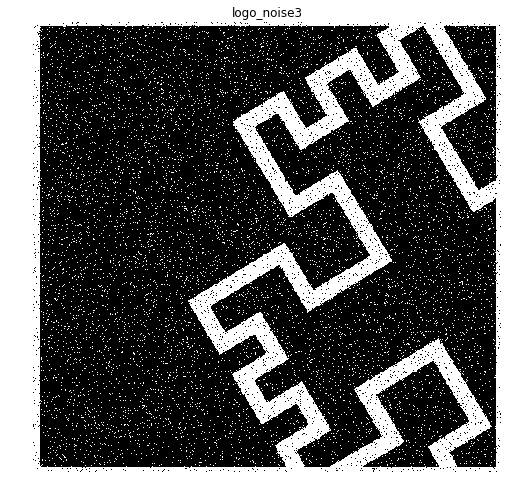

In [20]:
# read 'logo_noise3.png' as binary image
noisy3 = io.imread('logo_noise3.png').astype('bool_')

# display the noisy binary image
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(noisy3, cmap=plt.get_cmap('gray'))
ax.set_title('logo_noise3')
ax.axis('off')
fig.tight_layout()

**4.6. Again, utilizing your knowledge in image enhancement, find a way for reducing the noise in the noisy binary image `logo_noise3.png` and display the noisy and enhanced images in the same figure.**

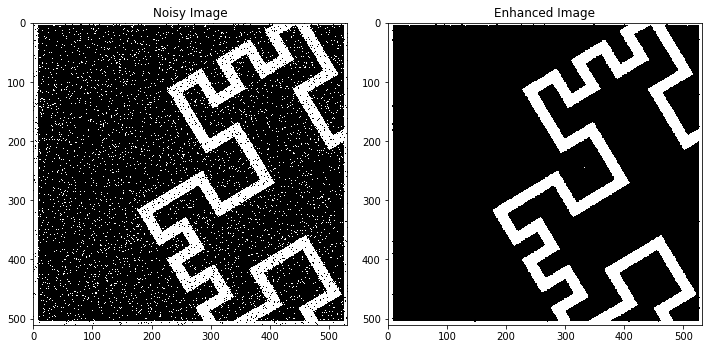

In [24]:
# remove the noise with the method of your choice
logo_median = median_filter(noisy3, size=3)

# display the noisy and enhanced image
fig,ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(noisy3, plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')

ax[1].imshow(logo_median, plt.get_cmap('gray'))
ax[1].set_title('Enhanced Image')

fig.tight_layout()


# 5. Image enhancement in frequency domain

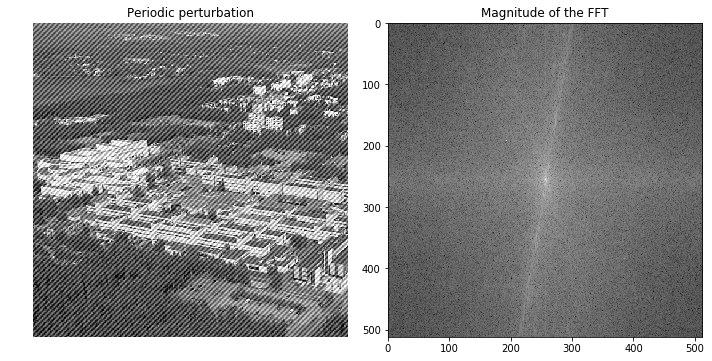

In [26]:
from scipy import fftpack

# read noisy image 'periodic.tif' and compute its Fourier transform (see Assignment #2)
periodic = io.imread('periodic.tif')
periodic_fft = fftpack.fftshift(fftpack.fft2(periodic))

# display the noisy image and the magnitude of its Fourier transform in the same figure
fig, ax = plt.subplots(1, 2, figsize = (10,7))

ax[0].imshow(periodic, cmap=plt.get_cmap('gray'))
ax[0].set_title('Periodic perturbation')
ax[0].axis('off')

ax[1].imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax[1].set_title('Magnitude of the FFT')

fig.tight_layout()

The image `periodic.tif` contains a periodic, i.e. sinusoidal, perturbation (see e.g. Section 5.2.3 in course book). You task is to remove the noise as well as you can. In practice, this consists of two main steps 1) locating the noise in the frequency domain, and 2) filtering the perturbation frequency using a proper filter.

Let's take first a look at what a 2D sinusoidal signal looks like in the 2D Fourier space by plotting three signals with different frequencies, `f=2`, `f=4` and `f=8` and their Fourier transforms (FT):

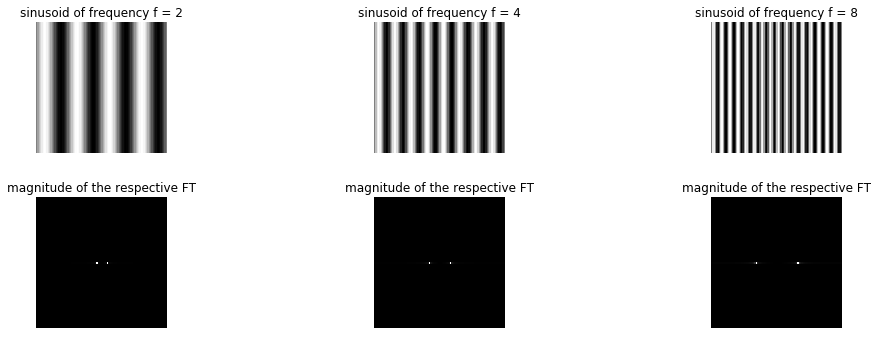

In [28]:
# sample (x,y) image coordinate space linearly
nx = 100; ny = 100;
x = np.linspace(-1, 1, nx);
y = np.linspace(-1, 1, ny); 
[X, Y] = np.meshgrid(x, y);

# plot the three 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,5))

f = 2;                 
z = np.sin(2*np.pi*f*X);
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid of frequency f = 2')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

f = 4;                 
z = np.sin(2*np.pi*f*X);
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid of frequency f = 4')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

f = 8;                 
z = np.sin(2*np.pi*f*X);
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid of frequency f = 8')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

As you can see, a horizontal 2D sinusoid corresponds to two horizontal peaks symmetric to the zero frequency in the magnitude of the Fourier domain and the higher the frequency the further away these peaks are from the origo.

Now, let's take a look at what happens if we rotate the horizontal 2D sinusoid 15, 45 and 75 degrees:

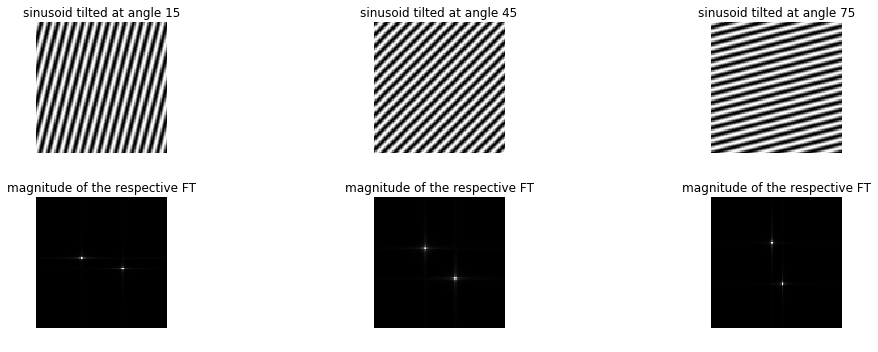

In [30]:
# plot rotated 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,5))

theta = 15*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid tilted at angle 15')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

theta = 45*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid tilted at angle 45')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

theta = 75*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid tilted at angle 75')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

Due to the properties of the 2D FT, the corresponding frequency peaks rotate exactly the same manner.

Now, it should be clear(er) what the periodic perturbation we are dealing with looks like in the FT of the noisy image, i.e. where to look for it. Can you now spot the reason for the periodic perturbation in the spectral image of the image `periodic.tif`?

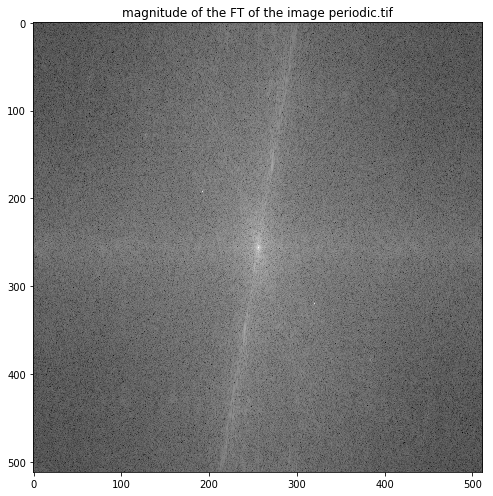

In [31]:
# display the magnitude of the FT
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax.set_title('magnitude of the FT of the image periodic.tif')
fig.tight_layout()

This kind of periodic perturbation should be filtered with a notch filter. However, in the following, an ideal band-reject filter is used for the sake of simplicity. So perform the following operations in the reserved code cells in order to remove the periodic perturbation from the test image.

(Please note that you can also implement a notch filter instead if you prefer.)

**5.1. Modify the ideal lowpass (or highpass) filter code from Assignment \#2 to construct an ideal band-reject filter `Hbr` and display band-reject filters with cut-off frequency `D0=0.2` and bandwidths `W=0.05` and `W=0.01` in the same figure.**

Hint: See lecture notes or course book what an ideal band-reject filter looks like. An ideal band-reject filter is just a combination of lowpass and highpass filtering, so now you need to combine the conditions `<` and `>` into one filter in order to reject frequencies within the narrow band.

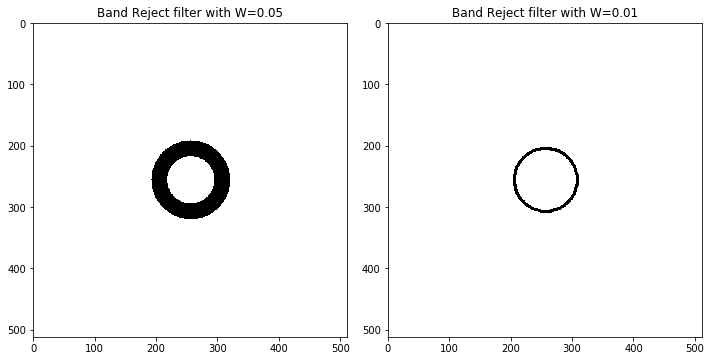

In [38]:
# create matrix D with absolute frequency values and size of the FT of the image 'periodic.tif' 
n = periodic_fft.shape
f1 = ( np.arange(0,n[0])-np.floor(n[0]/2) ) * (2./(n[0]))
f2 = ( np.arange(0,n[1])-np.floor(n[1]/2) ) * (2./(n[1]))
f1, f2 = np.meshgrid(f1, f2)
D = np.sqrt(f1**2 + f2**2)

# set cut-off frequency 'D0' to 0.2
D0 = 0.2

# set the bandwidth 'W' to 0.05
W = 0.05

# initialize filter matrix 'Hbr' with ones (same size as the fft2 of the test image)
Hbp = np.ones(n)

# set frequencies > or < the threshold to zero, other remain unaltered
Hbp[D>D0+W] = 0
Hbp[D<D0-W] = 0

Hbr_5 = np.ones(n)-Hbp

# do the same to construct ideal band-reject filter with 'W' of 0.01
W=0.01

Hbp = np.ones(n)
Hbp[D>D0+W] = 0
Hbp[D<D0-W] = 0

Hbr_1 = np.ones(n)-Hbp

# display both filters with different bandwidths in the same figure
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(Hbr_5)
ax[0].set_title('Band Reject filter with W=0.05')

ax[1].imshow(Hbr_1)
ax[1].set_title('Band Reject filter with W=0.01')

fig.tight_layout()

**5.2. Find the perturbation frequency in the magnitude of the FT that should be filtered out and filter the noisy image with a band-reject filter having proper `D0` and `W`. Then. display the reconstructed filtered image and the magnitude of its FT in the same figure.**

Hint: You should see two sharp peaks in the spectral image which should be filtered out. They are somewhat hard to spot but you should know where to look if you followed the introduction part of this assignment carefully. You can either try to determine the perturbation frequency: 

1. manually by trial and error, or 

2. automatically by finding the peak coordinates with __[`skimage.feature.peak_local_max()`](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max)__ function and picking the corresponding relative frequency from the frequency matrix `D` based on the found peak locations.

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


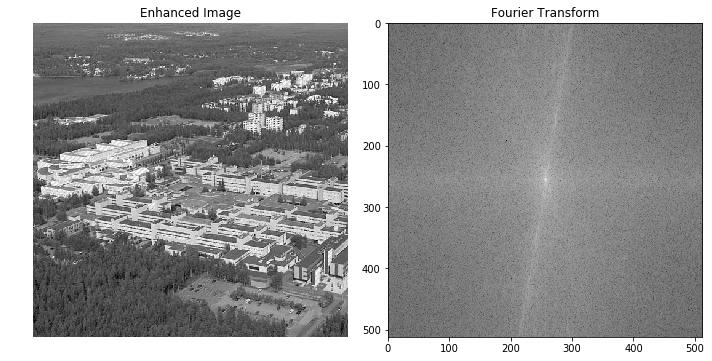

In [52]:
from skimage.feature import peak_local_max

# find perturbation frequency 'D0' manually or automatically
peak_coord = peak_local_max(np.real(periodic_fft), num_peaks=3)[2]
D0 = D[peak_coord[0], peak_coord[1]]

# create a filter mask 'Hbr' size of the FT of the test image
Hbr = np.ones(n)

# set frequencies within a _narrow_ reject band 'W' to zero, other remain unaltered
Hbr[D==D0] = 0

# apply the ideal band-reject filter to fft the test image
filtered_fft = np.multiply(periodic_fft, Hbr)

# reconstruct the enhanced image (see Assignment #2)
periodic_recons = fftpack.ifft2(fftpack.ifftshift(filtered_fft))
periodic_redons = np.real(periodic_recons)
periodic_recons = np.clip(periodic_recons, 0, 255)
periodic_recons = periodic_recons.astype('uint8')

# display the enhanced image and the magnitude of its FT
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(periodic_recons, cmap=plt.get_cmap('gray'))
ax[0].set_title('Enhanced Image')
ax[0].axis('off')

ax[1].imshow(np.log(np.abs(filtered_fft)+1))
ax[1].set_title('Fourier Transform')

fig.tight_layout()

**5.3. Finally, display the noisy image `periodic.tif` and the enhanced image in the same figure.**

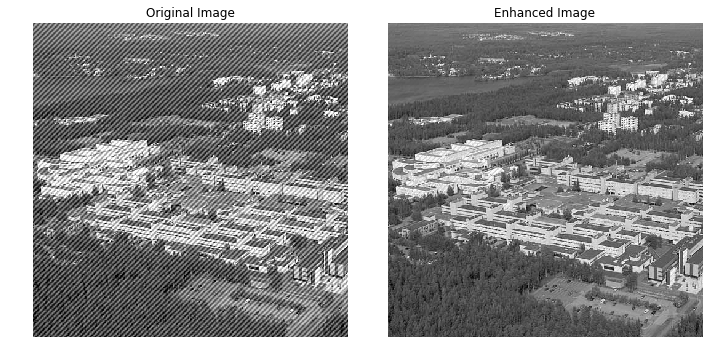

In [54]:
# display noisy and "restored" image
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(periodic)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(periodic_recons)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

fig.tight_layout()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

45 mins

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

No, excellent preparation.

# References
Same as Assignment 2.

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`DIP_PA3.ipynb` file) into **`DIP_PA3_[student number(s)].zip`** (e.g. `DIP_PA3_1234567.zip` if solo work or `DIP_PA3_1234567-7654321.zip` if pair work).
